In [1]:
%load_ext autoreload
%autoreload 2
import os
import sys

# Add the project's files to the python path
# file_path = os.path.dirname(os.path.dirname(os.path.abspath(__file__)))  # for .py script
file_path = os.path.dirname(os.path.abspath(""))  # for .ipynb notebook
sys.path.append(file_path)

# Run The basic Alpha Expansion algorithm

In [2]:
import warnings
import numpy as np

warnings.simplefilter("ignore", category=np.exceptions.VisibleDeprecationWarning)

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import scipy.spatial
from sklearn.cluster import KMeans
import maxflow
from graph_cut import *

(576, 720, 3)
labels (576, 720)


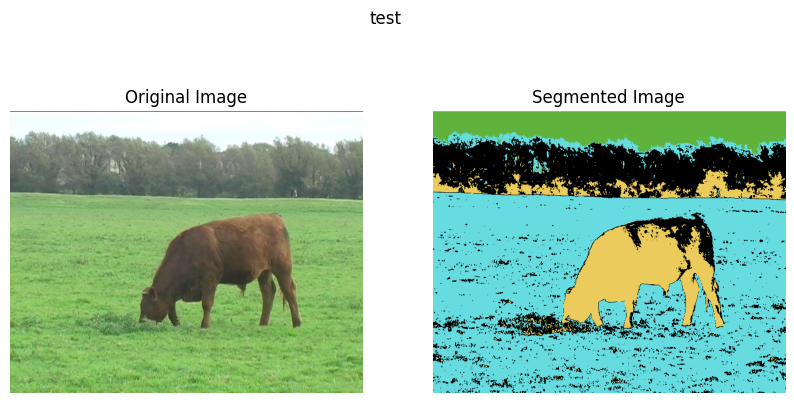

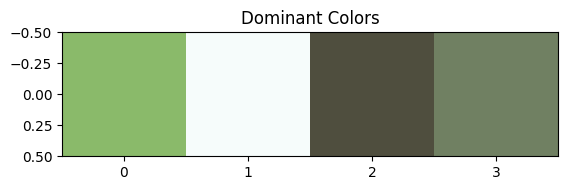

In [5]:
image_path = "../images/cow.ppm"  # Replace with actual image path
K = 4
image = load_image(image_path)
print(image.shape)
labels = initialize_labels_bis(image, K=K, method="kmeans")
print("labels", labels.shape)
show_segmentation(image, labels, title="test")
show_dominant_colors(labels=labels, image=image, K=K)

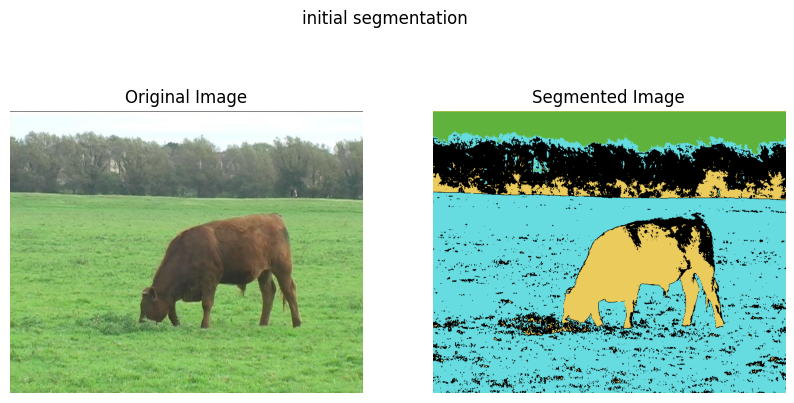

In [6]:
image_path = "../images/cow.ppm"  # Replace with actual image path
K = 4
image = load_image(image_path)
labels = initialize_labels_bis(image, K=K, method="kmeans")
show_segmentation(image, labels, title="initial segmentation")

histograms = compute_histograms(image, labels, K=K, bins=16)
unary_term = compute_unary_term(image, labels, histograms, K=K, bins=16)
pairwise_term = compute_pairwise_term(image, K=K, lambda_val=200)

(576, 720)


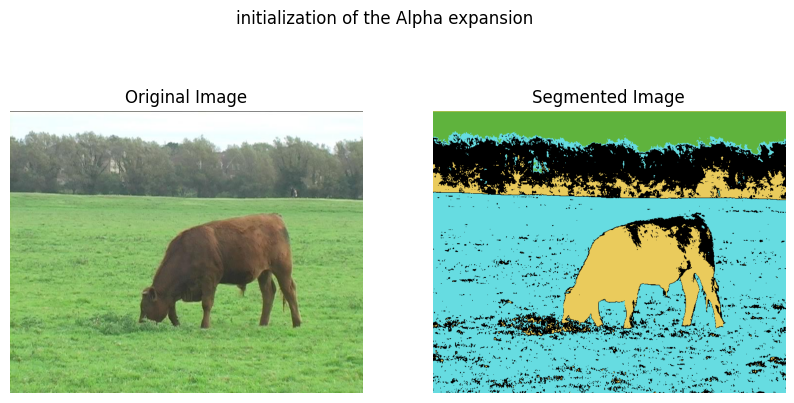

first energy 11445304.225180736
iterations nb: 0
computed energy 3250008.159573744 is it greater than initial energy? False


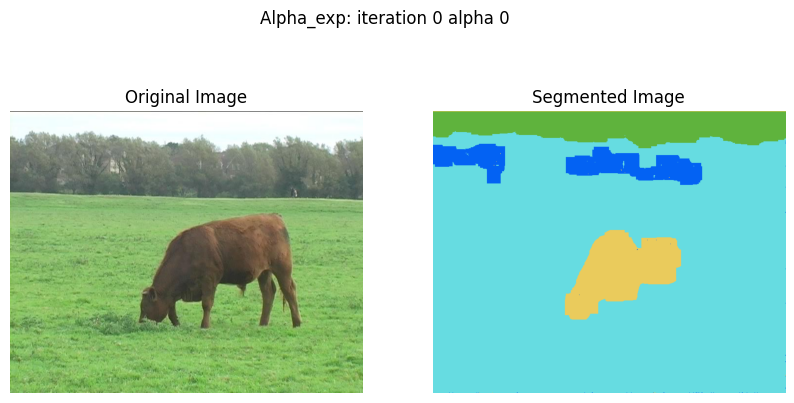

energy 3250008.159573744
computed energy 3076198.9060616894 is it greater than initial energy? False


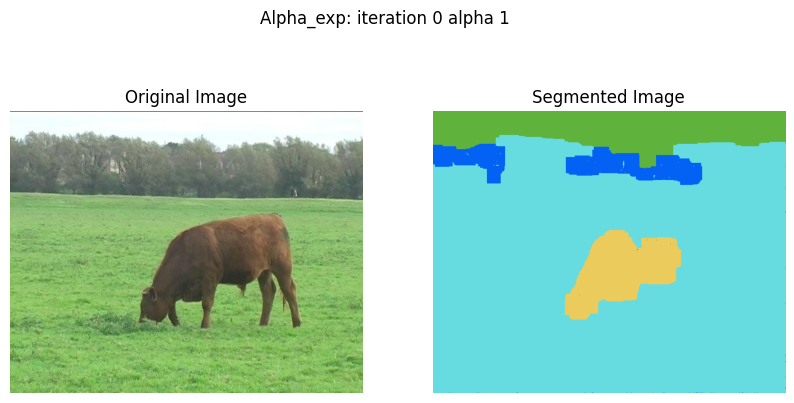

energy 3076198.9060616894
computed energy 2857893.4521047454 is it greater than initial energy? False


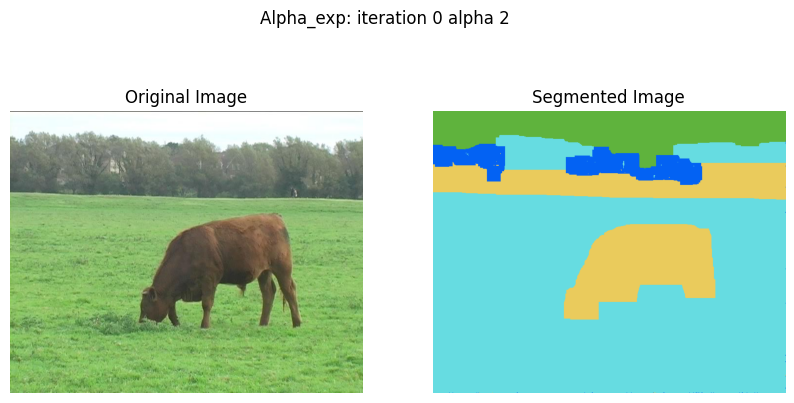

energy 2857893.4521047454
computed energy 2249155.919253187 is it greater than initial energy? False


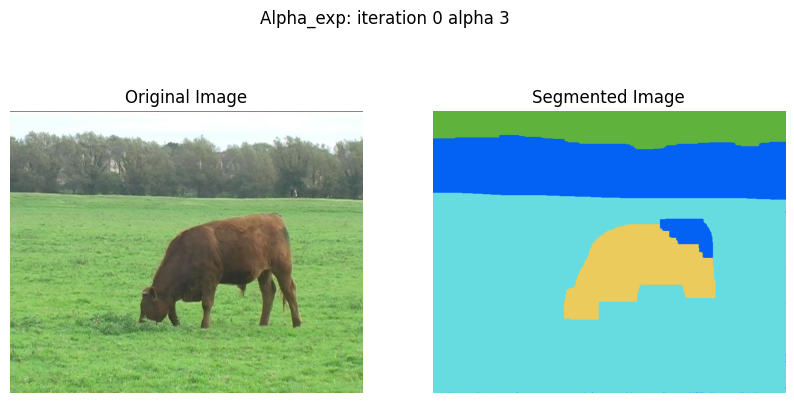

energy 2249155.919253187
iterations nb: 1
computed energy 2249155.919253187 is it greater than initial energy? False
computed energy 2243325.85527932 is it greater than initial energy? False


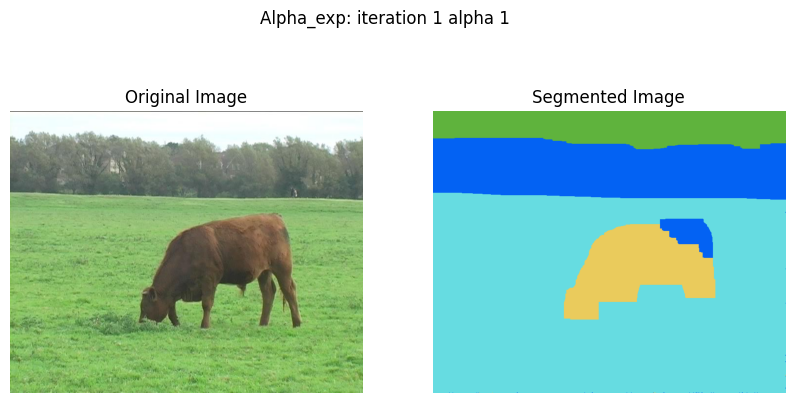

energy 2243325.85527932
computed energy 2243309.891790739 is it greater than initial energy? False


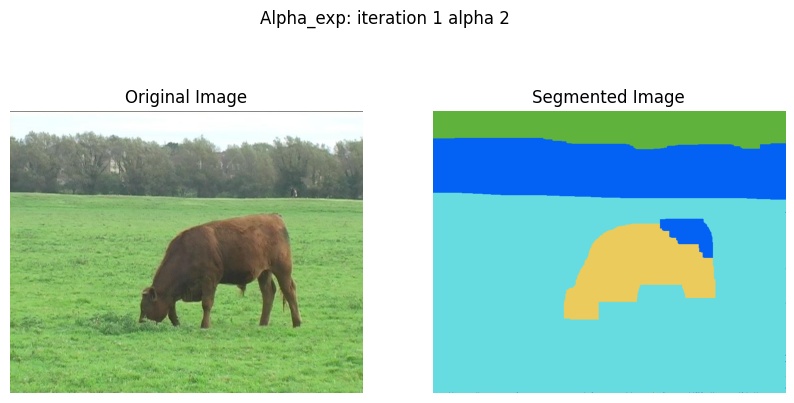

energy 2243309.891790739
computed energy 2243309.8917907383 is it greater than initial energy? False


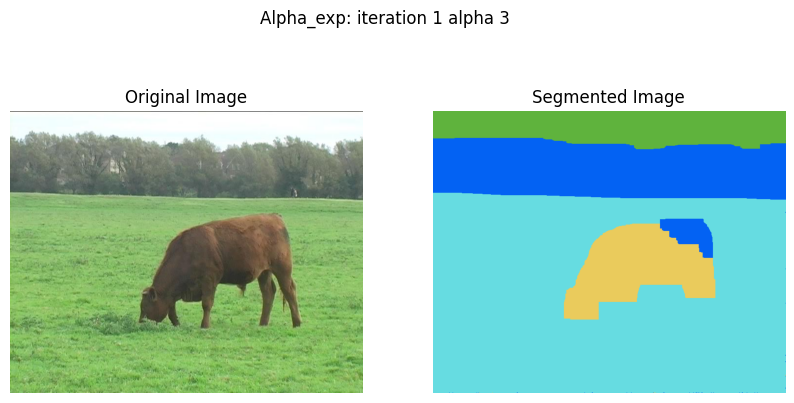

energy 2243309.8917907383
iterations nb: 2
computed energy 2243309.8917907383 is it greater than initial energy? False
computed energy 2243309.8917907383 is it greater than initial energy? False
computed energy 2243309.8917907383 is it greater than initial energy? False
computed energy 2243309.8917907383 is it greater than initial energy? False
iterations nb: 3
computed energy 2243309.8917907383 is it greater than initial energy? False
computed energy 2243309.8917907383 is it greater than initial energy? False
computed energy 2243309.8917907383 is it greater than initial energy? False
computed energy 2243309.8917907383 is it greater than initial energy? False


In [7]:
labels = np.argmin(unary_term, axis=2)
print(labels.shape)
from graph_cut.alpha_expansion import Alpha_expansion2

a_exp = Alpha_expansion2(
    image=image, unary=unary_term, pairwise=pairwise_term, K=K, max_iterations=4
)
labels = a_exp.run(image)